## 사용된 웹 기술을 확인하는 builtwith

In [1]:
# builtwith가 깔려있지 않은 경우
!pip install builtwith

In [2]:
import builtwith

builtwith.parse("http://www.google.com")

{'web-servers': ['Google Web Server']}

In [3]:
builtwith.parse("http://www.naver.com")

{}

In [4]:
builtwith.parse("http://www.wordpress.com")

{'blogs': ['PHP', 'WordPress'],
 'cms': ['WordPress'],
 'ecommerce': ['WooCommerce'],
 'font-scripts': ['Google Font API'],
 'programming-languages': ['PHP'],
 'web-servers': ['Nginx']}

In [5]:
builtwith.parse("http://www.daum.net")

{}

응답을 안 하면 서버에 대한 내용을 말하지 않으므로 보안유지를 할 수 있기는 하다. 그러나 그것을 이용하는 사람들은 그 정보를 알 길이 없다.

---

## 웹 사이트의 소유자를 확인하는 whois

In [1]:
# whois가 깔려있지 않은 경우
!pip install python-whois

In [7]:
import whois
print(whois.whois("naver.com"))

{
  "domain_name": [
    "NAVER.COM",
    "naver.com"
  ],
  "registrar": "Gabia, Inc.",
  "whois_server": "whois.gabia.com",
  "referral_url": null,
  "updated_date": [
    "2016-08-05 06:37:57",
    "2018-02-28 11:27:15"
  ],
  "creation_date": [
    "1997-09-12 04:00:00",
    "1997-09-12 00:00:00"
  ],
  "expiration_date": [
    "2023-09-11 04:00:00",
    "2023-09-11 00:00:00"
  ],
  "name_servers": [
    "NS1.NAVER.COM",
    "NS2.NAVER.COM",
    "ns1.naver.com",
    "ns2.naver.com"
  ],
  "status": [
    "clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited",
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited",
    "ok https://icann.org/epp#ok"
  ],
  "emails": [
    "white.4818@navercorp.com",
    "dl_ssl@navercorp.com",
    "abuse@gabia.com"
  ],
  "dnssec": "unsigned",
  "name": "NAVER Corp.",
  "org": "NAVER Corp.",
  "address": "6 Buljung-ro, Bundang-gu, Seongnam

In [8]:
print(whois.whois("http://www.uos.ac.kr/"))

{
  "domain_name": "uos.ac.kr",
  "registrant_org": "UNIVERSITY OF SEOUL",
  "registrant_address": null,
  "registrant_zip": null,
  "admin_name": "University of Seoul",
  "admin_email": "internet@uos.ac.kr",
  "admin_phone": null,
  "creation_date": "1998-05-15 00:00:00",
  "updated_date": "2018-01-02 00:00:00",
  "expiration_date": "2018-10-15 00:00:00",
  "registrar": "Inames Co., Ltd.(http://www.inames.co.kr)",
  "name_servers": [
    "ns1.uos.ac.kr",
    "ns2.uos.ac.kr"
  ]
}


---

## urllib _ HTTP Error에도 불구하고 크롤링하는 방법

In [9]:
from urllib.request import urlopen

The <b>urllib.request</b> module defines functions and classes which help in opening URLs(mostly HTTP) in a complex world - basic and digest authentication, redirections, cookies and more.

In [10]:
req = urlopen("http://python.org")
#req.read() # byte 타입이다. byte 타입을 디코딩해야 한다.

urllib.request.urlopen
>Open the URL url, which can be either a string or a Request object.

In [11]:
# urlopen으로 반환된 req는 byte 타입이므로 디코딩이 필요하다.

text = req.read().decode("utf-8")
text

'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="Han

위의 http://python.org 같이 깔끔한 URL을 urlopen하면 문제가 되지 않지만, url 검색창에 특정 검색 키워드를 입력하여 검색하면 각 웹사이트에서 robots.txt로 disallow 한 항목들은 접근할 수 없다. 

아래 예제에서도 구글 검색 키워드를 입력하여 urlopen 하면 로봇을 이용하여 정상적이지 않은 search를 한 것으로 간주되어 에러가 발생되는 것을 확인할 수 있다. 

In [12]:
# 구글에서 검색 키워드를 입력한 후 urlopen 하면 로봇이 정상적이지 않은 search를 한 것으로 간주하여 에러를 발생시킨다.

resp = urlopen("https://www.google.co.kr/search?q=%EA%B2%80%EC%83%89&oq=rjator&aqs=chrome.1.69i57j0l5.3052j0j8&sourceid=chrome&ie=UTF-8") # google을 byte 타입으로 받아옴
resp.read().decode('utf-8')

HTTPError: HTTP Error 403: Forbidden

위처럼 에러가 날 것이다. 이는 아래와 같이 네이버 검색창에 무언가 입력하여 얻은 URL로 확인해도 마찬가지이다.

In [21]:
from urllib.error import HTTPError

try :
    urlopen("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%ED%95%9C%EA%B8%80")
    
# 에러가 발생할 것인데, 아래와 같은 에러가 발생될 것이다.
except HTTPError as e :
    print('HTTPError.code >>> ',e.code)
    print()
    print('HTTPError.read >>> ',e.read)
    print()
    print('HTTPError.headers >>>\n')
    print(e.headers)

HTTPError.code >>>  403

HTTPError.read >>>  <function HTTPResponse.read at 0x1104b7b70>

HTTPError.headers >>>

Date: Mon, 16 Jul 2018 13:55:59 GMT
Content-Type: text/html; charset=UTF-8
Transfer-Encoding: chunked
Connection: close
Vary: Accept-Encoding
Set-Cookie: page_uid=T0yBJwpVuFRssthK/DCssssstus-378882; path=/; domain=.naver.com
Set-Cookie: _naver_usersession_=749TQAe/uk/I0ttXdzH3oQ==; path=/; expires=Mon, 16-Jul-18 14:00:59 GMT; domain=.naver.com
X-Frame-Options: SAMEORIGIN
X-XSS-Protection: 1; report=/p/er/post/xss
Cache-Control: no-cache, no-store, must-revalidate, max-age=0
Pragma: no-cache
Vary: Accept-Encoding




4XX Client Errors
- This class of status code is intended for situations in which the error seems to have been caused by the client

<b>urllib.request.Request(<i>url, data=None, headers={}, origin_req_host=None,unverifiable=False, method=None</i>)</b>

>This class is an abstraction of a URL request. 'headers' should be a dictionary. <u>This is often used to "spoof" the User-Agent header value</u> which is used by a browser to identify itself - some HTTP servers only allow requests coming from common browsers as opposed to scripts.

검색 키워드를 입력한 후 얻어낸 URL로도 HTML을 얻을 수 있도록 download 함수를 정의해보자. 

download 함수에서는 해당 사이트에 접근할 수 있는 User-agent를 Request의 header 부분에 dict 타입으로 넣어준다.

[해당 서버의 user-agent를 얻는 방법]

해당 사이트의 개발자 모드에서 <u> [Network] > [새로고침] > [Name에서 제일 위의 항목] > [user-agent 의 값] </u>을 가져와서 자신의 agent인 것처럼 사용하면 된다. 즉, 서버의 robots.txt에서 disallow를 한 항목들도 해당 서버의 user-agent를 이용하면 모두 접근할 수 있다.

In [22]:
from urllib.request import Request
from urllib.error import HTTPError

def download(url, agent = "python bot", num_retries = 2) :
    headers = {'User-agent' : agent} # User-agent 값을 넣어 줄 headers
    req = Request(url, headers = headers) # Request 객체 , data와 header 정보를 받는다.
    
    try :
        resp = urlopen(req) # url이 string이어도 되고 Request 객체여도 된다.
    except HTTPError as e :
        resp = None
        print('HTTPError.code >>> ',e.code)
        print()
        print('HTTPError.read >>> ',e.read)
        print()
        print('HTTPError.headers >>>\n')
        print(e.headers)

        if 500 <= e.code < 600 and num_retries > 0 : # 500 번대의 에러코드인 경우, 즉 Client쪽이 아닌 Server 쪽에서 발생시킨 에러일 경우 몇 번 더 재시도
            return download(url, num_retries = num_retries - 1) # 재귀적 호출로 num_retries 회수를 관리한다.
    return resp

In [23]:
html = download('http://httpstat.us/500') # 500대 에러를 내는 사이트

HTTPError.code >>>  500

HTTPError.read >>>  <function HTTPResponse.read at 0x1104a38c8>

HTTPError.headers >>>

Cache-Control: private
Server: Microsoft-IIS/10.0
X-AspNetMvc-Version: 5.1
Access-Control-Allow-Origin: *
X-AspNet-Version: 4.0.30319
X-Powered-By: ASP.NET
Set-Cookie: ARRAffinity=8d9742d8920fc8f87dbfb6e900a1f176e365d58296d2c5e44961e07bf1b65817;Path=/;HttpOnly;Domain=httpstat.us
Date: Mon, 16 Jul 2018 14:15:16 GMT
Connection: close
Content-Length: 0


HTTPError.code >>>  500

HTTPError.read >>>  <function HTTPResponse.read at 0x1104a31e0>

HTTPError.headers >>>

Cache-Control: private
Server: Microsoft-IIS/10.0
X-AspNetMvc-Version: 5.1
Access-Control-Allow-Origin: *
X-AspNet-Version: 4.0.30319
X-Powered-By: ASP.NET
Set-Cookie: ARRAffinity=8d9742d8920fc8f87dbfb6e900a1f176e365d58296d2c5e44961e07bf1b65817;Path=/;HttpOnly;Domain=httpstat.us
Date: Mon, 16 Jul 2018 14:15:17 GMT
Connection: close
Content-Length: 0


HTTPError.code >>>  500

HTTPError.read >>>  <function HTTPRespons

In [24]:
# 개발자 모드에서 가져온 해당 사이트의 User-agent를 이용해서 접속을 시도

agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html = download("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%ED%95%9C%EA%B8%80", agent)

In [25]:
html.read().decode('utf-8')

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="한글 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'한글\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'한글\'의 네이버 통합검색 결과입니다."> <title>한글 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="https

User-agent를 가져오기 전에는 html을 가져오는 것에 실패하였지만, 이처럼 성공적으로 가져올 수 있게되었다.

---

## Requests

The <b>Requests package</b> is recommended for a higher-level HTTP client interface.

In [26]:
import requests # 이 자체가 Request 객체를 만들어서 보내주는 역할까지 해준다.

def download_req(url, agent = "python bot", num_retries = 2) :
    headers = {'User-agent' : agent}
    
    # requests에서는 보내는 순간 resp를 받을 수 있다.
    # 즉, 위의 경우와는 달리 Request의 객체를 만들어서 urlopen에 넣어주는 절차를 없앨 수 있다.
    resp = requests.request("get", url, headers = headers) # get 방식인지 post 방식인지를 써준다.
    
    if 500 <= resp.status_code < 600 and num_retries > 0 : # 500 번대의 에러코드인 경우, 즉 Client쪽이 아닌 Server 쪽에서 발생시킨 에러일 경우 몇 번 더 재시도
        print(resp.status_code, resp.reason)
        return download_req(url, num_retries = num_retries -1)
    
    return resp

[참고] GET 방식과 POST 방식의 차이

> GET 방식 (가져오기, 조회용)
- URL에 변수를 포함시켜 요청
- 브라우저에서 URL을 입력하여 접근할 수 있도록 하는 방식
- 데이터가 헤더에 포함되어 전달됨
- URL에 데이터가 노출됨
- 길이 제한이 있음 (URL이 한없이 길어질 수 없음)
- zotlehlf tn dlTdma
- [형식] URL?변수명1=값1&변수명2=값2&변수명3=값3&…

> POST 방식 (부치기, 제출용)
- 데이터가 본문(BODY)에 포함되어 전달됨
- URL에 데이터가 노출되지 않음
- 길이 제한이 없음
- 캐시되지 않음

requests.request()

In [33]:
# 개발자 모드에서 가져온 user-agent를 이용해서 접속을 시도

agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html = download("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%ED%95%9C%EA%B8%80", agent)
html.read().decode('utf-8')

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="한글 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'한글\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'한글\'의 네이버 통합검색 결과입니다."> <title>한글 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="https

---

## parse

한글은 유니코드이므로 인코딩, 디코딩에 유의해야 한다.

In [34]:
from urllib import parse

from urllib import parse
> This module defines a standard interface to break Uniform Resource Locator (URL) strings up in components (addressing scheme, network location, path etc.), to combine the components back into a URL string, and to convert a “relative URL” to an absolute URL given a “base URL.”

In [40]:
# 웹에서는 byte 타입으로 한글을 다루어야 하는데, 아래와 같이 바꿀 수 있다.
print("byte 타입으로 바꾸기 => parse.qoute('한글') >>>",parse.quote("한글"))

byte 타입으로 바꾸기 => parse.qoute('한글') >>> %ED%95%9C%EA%B8%80


urllib.parse.quote(string, safe='/', encoding=None, errors=None)¶
>Replace special characters in string using the %xx escape. Letters, digits, and the characters '_.-~' are never quoted. By default, this function is intended for quoting the path section of URL. The optional safe parameter specifies additional ASCII characters that should not be quoted — its default value is '/'.

https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%ED%95%9C%EA%B8%80&oquery=%ED%81%AC%EB%A1%AC+%EA%B0%9C%EB%B0%9C%EC%9E%90%EB%8F%84%EA%B5%AC+user-agent&tqi=T0wDYwpySENssad5A30ssssssE4-270781

위의 url 예시를 보면 "한글" 이라고 써있어야 하는 query 부분이 바이트 타입(%ED%95%9C%EA%B8%80)으로 바뀌어 있음을 알 수 있다. 

이럴 경우 <u>"http:// URL 앞부분 " + parse.quote("한글") + "URL 뒷부분"</u> 이런 식으로 처리할 수 있다.

In [41]:
# json을 이용하여 더욱 편하게 처리하기

import json

In [42]:
params = {"where" : "nexearch",
         "sm" : "top_hty",
         "fbm" : 1,
         "ie" : "utf8",
         "query" : parse.quote("고려대")}
params

{'fbm': 1,
 'ie': 'utf8',
 'query': '%EA%B3%A0%EB%A0%A4%EB%8C%80',
 'sm': 'top_hty',
 'where': 'nexearch'}

In [43]:
jsonParams = json.dumps(params)
jsonParams

'{"where": "nexearch", "sm": "top_hty", "fbm": 1, "ie": "utf8", "query": "%EA%B3%A0%EB%A0%A4%EB%8C%80"}'

아래와 같이 json 형태를 post 방식으로 넣어줄 수 있다. json 형태를 optional로 넣어주면 string으로 바로 변환되어 들어갈 수 있다.

In [44]:
# 함수 재정의 => post 방식과 json 데이터를 활용 (녹음파일 26분 쯤)

def download_json(url, agent = "python bot", num_retries = 2) :
    headers = {'User-agent' : agent}
    
    #param json: (optional) json data to send in the body of the :class:`Request`.
    resp = requests.request("post", url, headers = headers, json = jsonParams) # json 데이터를 post 방식으로 넣어줄 수 있다.
            
    if 500 <= resp.status_code < 600 and num_retries > 0 : # request에서 에러를 다루는 코드(?)
        print(resp.status_code, resp.reason)
        return download(url, num_retries = num_retries -1)
    
    return resp

In [46]:
html_json = download_json("http://httpbin.org/post")
html_json.text

'{"args":{},"data":"\\"{\\\\\\"where\\\\\\": \\\\\\"nexearch\\\\\\", \\\\\\"sm\\\\\\": \\\\\\"top_hty\\\\\\", \\\\\\"fbm\\\\\\": 1, \\\\\\"ie\\\\\\": \\\\\\"utf8\\\\\\", \\\\\\"query\\\\\\": \\\\\\"%EA%B3%A0%EB%A0%A4%EB%8C%80\\\\\\"}\\"","files":{},"form":{},"headers":{"Accept":"*/*","Accept-Encoding":"gzip, deflate","Connection":"close","Content-Length":"122","Content-Type":"application/json","Host":"httpbin.org","User-Agent":"python bot"},"json":"{\\"where\\": \\"nexearch\\", \\"sm\\": \\"top_hty\\", \\"fbm\\": 1, \\"ie\\": \\"utf8\\", \\"query\\": \\"%EA%B3%A0%EB%A0%A4%EB%8C%80\\"}","origin":"122.45.108.228","url":"http://httpbin.org/post"}\n'

아래와 같이 requests.request() 대신 requests.get()을 활용할 수도 있다. 

In [50]:
# 함수 재정의 => get 방식 이용 (녹음파일 27분 쯤)

def download_get(url, agent = "python bot", num_retries = 2) :
    headers = {'User-agent' : agent}
    resp = requests.get(url, params = params , headers = headers) # get 방식에서는 파라미터를 넘기는 것이 아니므로 json 필요 없다.
    # Requests에서는 보내는 순간 resp를 받을 수 있다.
    
    if 500 <= resp.status_code < 600 and num_retries > 0 : # request에서 에러를 다루는 코드(?)
        print(resp.status_code, resp.reason)
        return download(url, num_retries = num_retries -1)
    uu
    return resp

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><meta content="origin" name="referrer"><title>%EA%B3%A0%EB%A0%A4%EB%8C%80 - Google 검색</title><script nonce="XkbdKmX0N59BvzEtx5yM4Q==">(function(){window.google={kEI:\'YrZMW-exIJik-Qay1YHwAg\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_YrZMW-exIJik-Qay1YHwAg\',kGL:\'KR\'};google.kHL=\'ko\';})();google.time=function(){return(new Date).getTime()};google.timers={};google.startTick=function(c,b){var a=b&&google.timers[b].t?google.timers[b].t.start:google.time();google.timers[c]={t:{start:a},e:{},m:{}};(a=window.performance)&&a.now&&(google.timers[c].wsrt=Math.floor(a.now()))};google.startTick("webaft");google.startTick("load");</script><!--srt--><script nonce="XkbdKmX0N59BvzEtx5yM4Q==">(function(){google.lc=[];google.li=0;googl
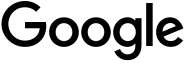

In [51]:
# 개발자 모드에서 가져온 user-agent를 이용해서 접속을 시도 ..... 내용 놓침 => 에러발생

agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html_get = download_get("https://www.google.co.kr/search?", agent)
html_get.text

---

## Crowling

In [52]:
!pip install beautifulsoup4

In [53]:
from bs4 import BeautifulSoup

In [56]:
html_bs = """
    <html>
        <head></head>
        <body>
            <div id="wrap">
                <p class = "content">
                    <a href = "#">link</a>
                </p>
            </div>
        </body>
    </html>
"""

In [57]:
# html이 굉장히 잘 열려있고 닫혀있는 태그를 사용했으므로 빠른 방식인 lxml으로 처리한다.
doc_bs = BeautifulSoup(html_bs, "lxml") 

In [58]:
doc_bs.contents

[<html>
 <head></head>
 <body>
 <div id="wrap">
 <p class="content">
 <a href="#">link</a>
 </p>
 </div>
 </body>
 </html>, '\n']

In [59]:
doc_bs.div

<div id="wrap">
<p class="content">
<a href="#">link</a>
</p>
</div>

In [60]:
doc_bs.p

<p class="content">
<a href="#">link</a>
</p>

In [61]:
doc_bs.a

<a href="#">link</a>

In [62]:
doc_bs.a["href"]

'#'

크롤러로 무언가를 관리하려면 내부주소와 외부주소를 알아야 한다...(?)

In [63]:
print(doc_bs.div["id"])
print(doc_bs.p["class"])

wrap
['content']


## 뽐뿌 예제

In [64]:
# 위에서 만든 get 방식의 다운로드 함수 응용 _ 내가 임의로 수정함

def download_get_adv(url, params, agent = "python bot", num_retries = 2) :
    headers = {'User-agent' : agent}
    resp = requests.get(url, params = params , headers = headers) # get 방식에서는 파라미터를 넘기는 것이 아니므로 json 필요 없다.
    # Requests에서는 보내는 순간 resp를 받을 수 있다.
    
    if 500 <= resp.status_code < 600 and num_retries > 0 : # request에서 에러를 다루는 코드(?)
        print(resp.status_code, resp.reason)
        return download(url, num_retries = num_retries -1)
    
    return resp

In [65]:
params = {"q" : parse.quote("고려대")}
url_ppomppu = "http://www.ppomppu.co.kr/"

In [67]:
# 개발자 모드에서 가져온 user-agent를 이용해서 접속을 시도 ..

agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html_ppomppu = download_get_adv(url_ppomppu, params, agent = agent)

In [68]:
html_ppomppu.text

'\x1f�\x08\x00\x00\x00\x00\x00\x00\x03蔗�{\x13G�0�sx\x1e��FYbsb[7_\x01;/����褓�^捨헝o,�m\x05I��d�w7好8\\�@0#$Y｛�eiLbl ,�$��\x0f캅�쉼\x0e�C�>_W勸~�d\x0bCpb,�tWuWWWWUWW晸q凋\x03G�鋌��~뽄���瓜룃:�\x14�J俺�\x07���G\x0e㈜�y�����A��X)넌`70f哥T엎�\x02)頁v�n�rpp�aP邦X��G~�<\x0e게PY�XoO⒨�룸\x15\x1d法�\x1b�CSz徨D�)\x04企�?\x0e\x18��+\x0e0f;m뚱\x1f\x19꽥\n��쓸+妊q�\x12ゎA�~�jｍ臟����U����\x1c�Y\r�輔>��Q6芷\x18\x0c����\tBg녑₁和嶼�?��,�糞cL�布鷹늅�V�k�)\x13缶�\x06入�5Ω哄웍仇��\x06\x1dx�!（��Z���R����jF젓轍 c粮RJ�\x12磅匠Q_�V���\x1e�0V{J�A�沙撒��\x19tt=�R�\x0cf<��급┌�t;��:d쫏L\x03┲G\x036�J�S멕�C눌\x0e�)k\x1fm�綾�\x0cCz�!\x0e\x18\x7f$戚�\'�"M�X\x19\x0bm�\x0f�+�앴\x06\x13��J�\x14쓱X0u-\x03\r:╇�UI\n��\x06\\���X�5*u나Q塘`1�\x11\x14��殖金@�L:&�4��=�\x05\x06�\x1e� ��\x1b�F�\x03ぃz��\x1f]�\'� �bH�~踵8�\x1aC佚^�T\nF`��`>�海to{�瞥^\x0c卯槿0}F��\x18l�o&汐�z)��8羅.cg^=��T\r꾀폣\x1a\x1b0┃���5\x08珀^\x13迎�\x0eBR\t\x07�U$�*ㅂ)\x1cL\x1a″EV�ZIj6@3��c껫�ZT\x1au�D�\r�Oj�FB便唐��z�k�Qv�ly볘��6�\r�]\x12o柬F���,�5必擘\r베=頃�\x07�V�jQ�6황D�\n�啄O=\x0ce�+�\x7f����(經vぇ�`待���\x10])��\x04뀀\x06�\x08fQ\x12망��\x01��

뽐뿌는 인코딩이 개판으로 되어있어서 글자가 깨지게 나온다.

In [73]:
html_ppomppu.decode('utf-8') # 에러가 발생한다. 

AttributeError: 'Response' object has no attribute 'decode'

에러가 발생하는데, 제일 처음에 urllib를 이용하여 만들었던 함수를 다시 이용해보자.

In [74]:
from urllib.request import Request
from urllib.error import HTTPError

def download(url, agent = "python bot", num_retries = 2) :
    headers = {'User-agent' : agent}
    req = Request(url, headers = headers) # Request 객체 , data와 header 정보를 받는다.
    
    try :
        resp = urlopen(req) # url이 string이어도 되고 Request 객체여도 된다.
    except HTTPError as e :
        resp = None
        print(e.code, e.read, e.headers)

        if 500 <= e.code < 600 and num_retries > 0 :
            return download(url, num_retries = num_retries - 1) # 재귀적 호출로 num_retries 회수를 관리한다.
    return resp

In [103]:
# 개발자 모드에서 가져온 user-agent를 이용해서 접속을 시도

agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html1 = download(url_ppomppu, agent = agent)
# html1.read() 하면 euc-kr로 인코딩 되어 있는 것을 처리해야 하는 것을 알 수 있다.

In [104]:
html_decoded = html1.read().decode('euc-kr', 'ignore')

In [105]:
text = BeautifulSoup(html_decoded, 'lxml')
text

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="PPOMPPU CO." name="author"/>
<meta content="뽐뿌" name="description"/>
<meta content="" name="keywords"/>
<!--
<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=device-dpi" />
-->
<meta content="http://www.ppomppu.co.kr/images/icon_app_20160427.png" property="og:image"/>
<meta content="뽐뿌" property="og:site_name"/>
<meta content="website" property="og:type"/>
<title>뽐뿌 - 사람이 좋아 함께하는 곳</title><!--<link href='http://fonts.googleapis.com/css?family=Noto+Sans' rel='stylesheet' type='text/css'>-->
<link href="//www.ppomppu.c

In [106]:
aList = text.find_all("a")
len(aList)

551

In [107]:
for row in aList :
    print(row.attrs)

{'rel': ['#tab1-contents'], 'class': ['tab']}
{'rel': ['#tab2-contents'], 'class': ['tab']}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=event'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=buy'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=help'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=etc_info'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=free_picture'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=news2'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=review'}
{'href': 'http://www.ppomppu.co.kr/recent_main_article.php?type=market'}
{'href': 'http://www.ppomppu.co.kr/myinfo/env.php?cmd=env', 'target': '_blank'}
{'href': 'http://www.ppomppu.co.kr/myinfo/member_bookmark.php', 'target': '_blank'}
{'href': 'http://www.ppomppu.co.kr/index.php', 'target': '_self'}
{'href': 'http:

---

## 실습 _ p.41

In [ ]:
# prac_html01 = requests.get("http://www.pythonscraping.com/pages/")
# prac_doc01 =  BeautifulSoup(prac_html01.text, "lxml")

# prac_div01 = prac_doc01.find("div", id="text")
# print(prac_div01.get_text())

# tagList = prac_doc01.find_all("span", class_="green")
# print(len(tagList))

# for tag in tagList:
#     print(tag.get_text())

# tagList = prac_doc01.find_all("span", {"class" : "green"})
# print(len(tagList))

# for tag in tagList:
#     print(tag.get_text())

In [ ]:
# print(prac_doc01.find("div"))